In [13]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.widgets import *
from fastai.metrics import error_rate
from pathlib import Path

doc(ImageDataBunch)


In [2]:
doc(ImageDataBunch.from_folder)

In [3]:
path = Path('/home/jupyter/projects/project-1/training-data/images'); path

PosixPath('/home/jupyter/projects/project-1/training-data/images')

In [5]:
def toPathsAndLabels(path, trainFile):
    paths = []
    labels = []
    for name in trainFile:
        name = name.rstrip()
        name+='.jpg'
        paths.append(path/name)
        labels.append(re.search('^(.+)/([^/]+)$', name).group(1).replace('_', ' '))
    return paths, labels
trainFile = open("../project-1/training-data/train.txt", "r")
fn_paths, fn_labels = toPathsAndLabels(path, trainFile); fn_paths[:2]; fn_labels[:2]

['apple pie', 'apple pie']

In [6]:
with open('paths_and_labels.txt', 'w') as f:
    for path, label in zip(fn_paths, fn_labels):
        f.write("Path: %s ... Label: %s\n" % (path, label))

In [7]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=fn_labels, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)

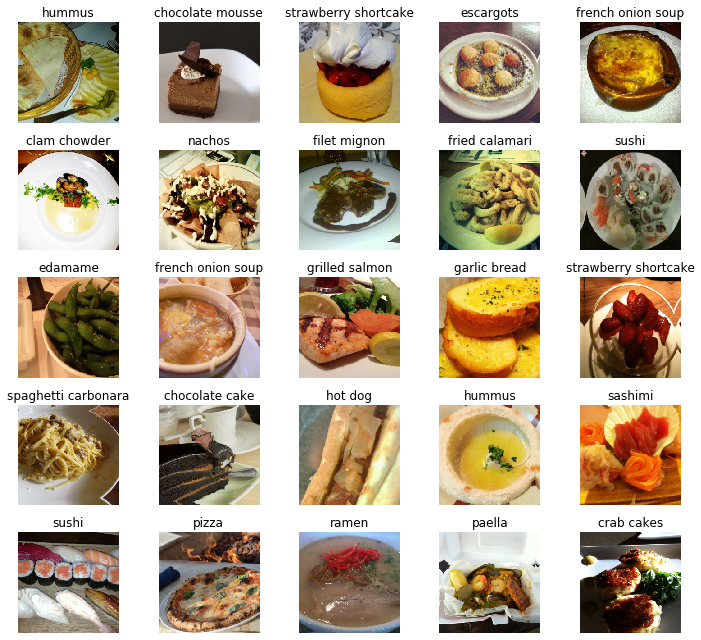

In [8]:
data.show_batch(rows=5, figsize=(10,9))

In [20]:
doc(data.show_batch)

show_batch [source] [test] show_batch ( rows : int = 5 , ds_type : DatasetType = <DatasetType.Train: 1> , reverse : bool = False , ** kwargs ) 
 
 × Tests found for show_batch : pytest -sv tests/test_basic_data.py::test_DataBunch_show_batch [source] To run tests please refer to this guide . Show a batch of data in ds_type on a few rows . 
 Show in docs

In [9]:
len(data.classes),data.c

(101, 101)

In [32]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, model_dir="/home/jupyter/projects/project-2/models")
learn.model_dir

'/home/jupyter/projects/project-2/models'

In [33]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [25]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.424556,1.833206,0.471551,05:55
1,1.929317,1.525291,0.399274,05:54
2,1.680597,1.376571,0.360264,05:53
3,1.551244,1.339492,0.350363,05:59


In [26]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

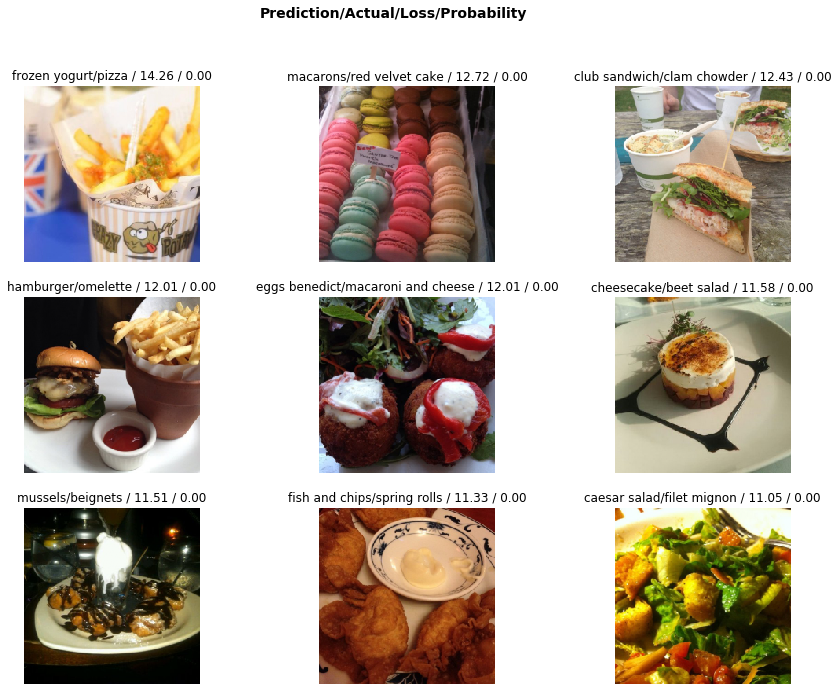

In [27]:
interp.plot_top_losses(9, figsize=(15,11))

In [16]:
interp.most_confused(min_val=2)

[('chocolate mousse', 'chocolate cake', 20),
 ('filet mignon', 'steak', 20),
 ('filet mignon', 'pork chop', 16),
 ('paella', 'fried rice', 16),
 ('steak', 'filet mignon', 16),
 ('tuna tartare', 'beef tartare', 16),
 ('apple pie', 'bread pudding', 15),
 ('pork chop', 'steak', 15),
 ('pulled pork sandwich', 'hamburger', 15),
 ('ramen', 'pho', 15),
 ('steak', 'baby back ribs', 15),
 ('beef tartare', 'tuna tartare', 14),
 ('ice cream', 'frozen yogurt', 14),
 ('cheesecake', 'strawberry shortcake', 13),
 ('greek salad', 'caesar salad', 13),
 ('panna cotta', 'chocolate mousse', 13),
 ('beet salad', 'tuna tartare', 12),
 ('cheesecake', 'panna cotta', 12),
 ('dumplings', 'gyoza', 12),
 ('filet mignon', 'prime rib', 12),
 ('ravioli', 'shrimp and grits', 12),
 ('sushi', 'sashimi', 12),
 ('beef carpaccio', 'beet salad', 11),
 ('beet salad', 'greek salad', 11),
 ('scallops', 'crab cakes', 11),
 ('donuts', 'beignets', 10),
 ('poutine', 'french fries', 10),
 ('ravioli', 'lasagna', 10),
 ('ravioli', '

In [34]:
learn.save('stage-2')

In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


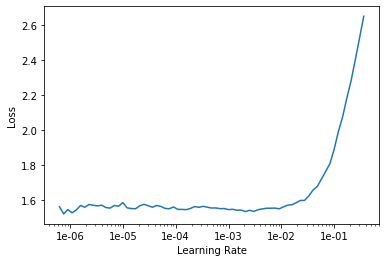

In [26]:
learn.recorder.plot()

In [27]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,1.688618,1.344607,0.350363,07:14
1,1.128507,1.026019,0.271155,07:15


In [35]:
ImageCleaner(losses, idxs, path)

AttributeError: 'Tensor' object has no attribute 'classes'